In [8]:
# import numpy as np
# import pandas as pd

In [9]:
# # The function to add a certain number of columns
# def adder(Data, times):
    
#     for i in range(1, times + 1):
    
#         z = np.zeros((len(Data), 1), dtype = float)
#         Data = np.append(Data, z, axis = 1)            
#     return Data

# # The function to delete a certain number of columns
# def deleter(Data, index, times):
    
#     for i in range(1, times + 1):
    
#         Data = np.delete(Data, index, axis = 1)            
#     return Data

# # The function to delete a certain number of rows from the beginning
# def jump(Data, jump):
    
#     Data = Data[jump:, ]
    
#     return Data

In [10]:
# def ma(Data, lookback, what, where):
    
#   for i in range(len(Data)):
#     try:
#         Data[i, where] = (Data[i - lookback + 1:i + 1, what].mean())
#     except IndexError:
#         pass
#     return Data

# def ema(Data, alpha, lookback, what, where):

#     # alpha is the smoothing factor
#     # window is the lookback period
#     # what is the column that needs to have its average calculated
#     # where is where to put the exponential moving average

#     alpha = alpha / (lookback + 1.0)
#     beta  = 1 - alpha
    
#     # First value is a simple SMA
#     Data = ma(Data, lookback, what, where)
    
#     # Calculating first EMA
#     Data[lookback + 1, where] = (Data[lookback + 1, what] * alpha) + (Data[lookback, where] * beta)
#     # Calculating the rest of EMA
#     for i in range(lookback + 2, len(Data)):
#             try:
#                 Data[i, where] = (Data[i, what] * alpha) + (Data[i - 1, where] * beta)
        
#             except IndexError:
#                 pass
#     return Data

    

In [11]:
# def rsi(Data, rsi_lookback, what1, what2):
#     # Data: This is the data of the stock's price history.
#     # rsi_lookback: This is the number of days to look back when calculating the RSI.
#     # what1: This is the index of the data in the Data array to be used as the stock price.
#     # what2: This is the index of the data in the Data array to be used in the adder and ema functions.

#     # From exponential to smoothed
#     rsi_lookback = (rsi_lookback * 2) - 1  
        
#     # Get the difference in price from previous step
#     delta = []
   
#     for i in range(len(Data)):
#         try:
#             diff = Data[i, what1] - Data[i - 1, what1] 
#             delta = np.append(delta, diff)                  
#         except IndexError:
#             pass
        
#     delta = np.insert(delta, 0, 0, axis = 0)               
#     delta = delta[1:] 

#     # Make the positive gains (up) and negative gains (down) Series
#     up, down = delta.copy(), delta.copy()
#     up[up < 0] = 0
#     down[down > 0] = 0
    
#     up = np.array(up)
#     down = np.array(down)
    
#     roll_up = up
#     roll_down = down

#     # Reshaping the roll_up an roll_down to size (-1, 1) meaning 1 column and n rows 
#     roll_up = np.reshape(roll_up, (-1, 1))
#     roll_down = np.reshape(roll_down, (-1, 1))

#     # adder and ema to calculate ema of up and down
#     roll_up = adder(roll_up, 3)
#     roll_down = adder(roll_down, 3)
    
#     roll_up = ema(roll_up, 2, rsi_lookback, what2, 1)
#     roll_down = ema(abs(roll_down), 2, rsi_lookback, what2, 1)
    
#     # remove the initial data points that do not have sufficient data to calculate the RSI
#     roll_up = roll_up[rsi_lookback:, 1:2]
#     roll_down = roll_down[rsi_lookback:, 1:2]
#     Data = Data[rsi_lookback + 1:,]
    
#     # Calculate the RS & RSI
#     RS = roll_up / roll_down
#     RSI = (100.0 - (100.0 / (1.0 + RS)))
#     RSI = np.array(RSI)
#     RSI = np.reshape(RSI, (-1, 1))
#     RSI = RSI[1:,]
    
#     Data = np.concatenate((Data, RSI), axis = 1)    
#     return Data


In [12]:
# def stochastic(Data, lookback, what, high, low, where):
        
#     for i in range(len(Data)):
        
#         try:
#           Data[i, where] = (Data[i, what] - min(Data[i - lookback + 1:i + 1, low])) / (max(Data[i - lookback + 1:i + 1, high]) - min(Data[i - lookback + 1:i + 1, low]))
        
#         except ValueError:
#             pass
    
#     Data[:, where] = Data[:, where] * 100            
#     return Data
    
# # The Data variable refers to the OHLC array
# # The lookback variable refers to the period (5, 14, 21, etc.)
# # The what variable refers to the closing price
# # The high variable refers to the high price
# # The low variable refers to the low price
# # The where variable refers to where to put the Oscillator

In [13]:
# def stoch_rsi(Data, lookback, where):
    
#     # Calculating RSI of the Closing prices
#     Data = rsi(Data, lookback, 3, 0)
    
#     # Adding two columns
#     Data = adder(Data, 2)
    
#     for i in range(len(Data)):
        
#         try:
#             Data[i, where + 1] = (Data[i, where] - min(Data[i - lookback + 1:i + 1, where])) / (max(Data[i - lookback + 1:i + 1, where]) - min(Data[i - lookback + 1:i + 1, where]))
        
#         except ValueError:
#             pass
    
#     Data[:, where + 1] = Data[:, where + 1] * 100 
    
#     # Signal Line using a 3-period moving average
#     Data = ma(Data, 3, where + 1, where + 2)
    
#     Data = deleter(Data, where, 2)
#     Data = jump(Data, lookback)    
    
#     return Data

In [14]:
# my_data = None
# lookback = 14

In [15]:
# my_data = rsi(my_data, lookback, 3, 0)
# my_data = stoch_rsi(my_data, 14, 4)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import time

In [53]:
df = pd.read_csv(r"Z:\\projects\\ez_money\\raw_data_30m\\EURUSD_M30.csv", sep='\t')


In [35]:
# df = df[:500]
# df

,Time,Open,High,Low,Close,Volume,RSI,K,D
0,2007-02-05 10:30:00,1.29246,1.29273,1.29162,1.29273,277811,NaN,NaN,NaN
1,2007-02-05 11:00:00,1.29271,1.29325,1.29240,1.29304,157253,NaN,NaN,NaN
2,2007-02-05 11:30:00,1.29304,1.29351,1.29270,1.29336,106005,NaN,NaN,NaN
3,2007-02-05 12:00:00,1.29331,1.29337,1.29257,1.29297,99885,NaN,NaN,NaN
4,2007-02-05 12:30:00,1.29295,1.29360,1.29231,1.29266,68612,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
495,2007-02-19 18:00:00,1.31488,1.31514,1.31438,1.31498,24440,53.344659,6.936341,24.846031
496,2007-02-19 18:30:00,1.31492,1.31568,1.31433,1.31518,24650,55.526601,19.495277,16.318627
497,2007-02-19 19:00:00,1.31512,1.31530,1.31456,1.31487,23856,51.505785,19.940925,15.457514
498,2007-02-19 19:30:00,1.31491,1.31627,1.31440,1.31619,25008,63.594436,46.954268,28.796823


In [54]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[diff > 0]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[diff < 0]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [55]:
df['RSI'] = computeRSI(df['Close'], 14)

In [56]:
df

,Time,Open,High,Low,Close,Volume,RSI
0,2007-02-05 10:30:00,1.29246,1.29273,1.29162,1.29273,277811,NaN
1,2007-02-05 11:00:00,1.29271,1.29325,1.29240,1.29304,157253,NaN
2,2007-02-05 11:30:00,1.29304,1.29351,1.29270,1.29336,106005,NaN
3,2007-02-05 12:00:00,1.29331,1.29337,1.29257,1.29297,99885,NaN
4,2007-02-05 12:30:00,1.29295,1.29360,1.29231,1.29266,68612,NaN
...,...,...,...,...,...,...,...
199995,2023-02-10 13:00:00,1.06736,1.06766,1.06709,1.06712,3963,32.357223
199996,2023-02-10 13:30:00,1.06712,1.06751,1.06680,1.06744,5103,35.331861
199997,2023-02-10 14:00:00,1.06742,1.06750,1.06709,1.06730,3513,34.614669
199998,2023-02-10 14:30:00,1.06732,1.06786,1.06731,1.06783,2894,39.612150


In [57]:
def stochastic(data, k_window, d_window, window):
    
    # input to function is one column from df
    # containing closing price or whatever value we want to extract K and D from
    
    min_val  = data.rolling(window=window, center=False).min()
    max_val = data.rolling(window=window, center=False).max()
    
    stoch = ( (data - min_val) / (max_val - min_val) ) * 100
    
    K = stoch.rolling(window=k_window, center=False).mean() 
    #K = stoch
    
    D = K.rolling(window=d_window, center=False).mean() 


    return K, D
    

In [59]:
# The "K" line is a fast moving average and is calculated as follows: K = 100 * (RSI - RSI min) / (RSI max - RSI min)

# The "D" line is a slow moving average of the K line and is used as a signal line to identify overbought and oversold conditions. 
# The D line is calculated using a simple moving average or exponential moving average of the K line.

df['K'], df['D'] = stochastic(df['RSI'], 3, 3, 14)

In [74]:
df

,Time,Open,High,Low,Close,Volume,RSI,K,D
0,2007-02-06 02:00:00,1.29203,1.29288,1.29186,1.29249,22880,51.658220,43.507364,22.288418
1,2007-02-06 02:30:00,1.29247,1.29315,1.29205,1.29226,21807,48.377592,70.702269,43.077479
2,2007-02-06 03:00:00,1.29229,1.29348,1.29207,1.29336,22810,61.101047,89.012800,67.740811
3,2007-02-06 03:30:00,1.29333,1.29390,1.29297,1.29384,20115,65.138822,93.861572,84.525547
4,2007-02-06 04:00:00,1.29385,1.29463,1.29331,1.29385,22827,65.219821,100.000000,94.291457
...,...,...,...,...,...,...,...,...,...
199964,2023-02-10 13:00:00,1.06736,1.06766,1.06709,1.06712,3963,32.357223,33.706490,22.986465
199965,2023-02-10 13:30:00,1.06712,1.06751,1.06680,1.06744,5103,35.331861,52.383956,37.374331
199966,2023-02-10 14:00:00,1.06742,1.06750,1.06709,1.06730,3513,34.614669,55.382669,47.157705
199967,2023-02-10 14:30:00,1.06732,1.06786,1.06731,1.06783,2894,39.612150,74.459221,60.741949


In [76]:
# Plotting
def plot_price(df):
    # plot price
    plt.figure(figsize=(15,5))
    plt.plot(df['Close'])
    plt.title('Price chart (Close)')
    plt.show()
    return None

def plot_RSI(df):
    # plot correspondingRSI values and significant levels
    plt.figure(figsize=(15,5))
    plt.title('RSI chart')
    plt.plot(df['RSI'])

    plt.axhline(0, linestyle='--', alpha=0.1)
    plt.axhline(20, linestyle='--', alpha=0.5)
    plt.axhline(30, linestyle='--')

    plt.axhline(70, linestyle='--')
    plt.axhline(80, linestyle='--', alpha=0.5)
    plt.axhline(100, linestyle='--', alpha=0.1)
    plt.show()
    return None

def plot_stoch_RSI(df):
    # plot corresponding Stoch RSI values and significant levels
    plt.figure(figsize=(15,5))
    plt.title('stochRSI chart')
    plt.plot(df['K'])
    plt.plot(df['D'])

    plt.axhline(0, linestyle='--', alpha=0.1)
    plt.axhline(20, linestyle='--', alpha=0.5)
    #plt.axhline(30, linestyle='--')

    #plt.axhline(70, linestyle='--')
    plt.axhline(80, linestyle='--', alpha=0.5)
    plt.axhline(100, linestyle='--', alpha=0.1)
    plt.show()
    return None

In [77]:
def plot_all(df):
    plot_price(df)
    #plot_RSI(df)
    plot_stoch_RSI(df)
    return None

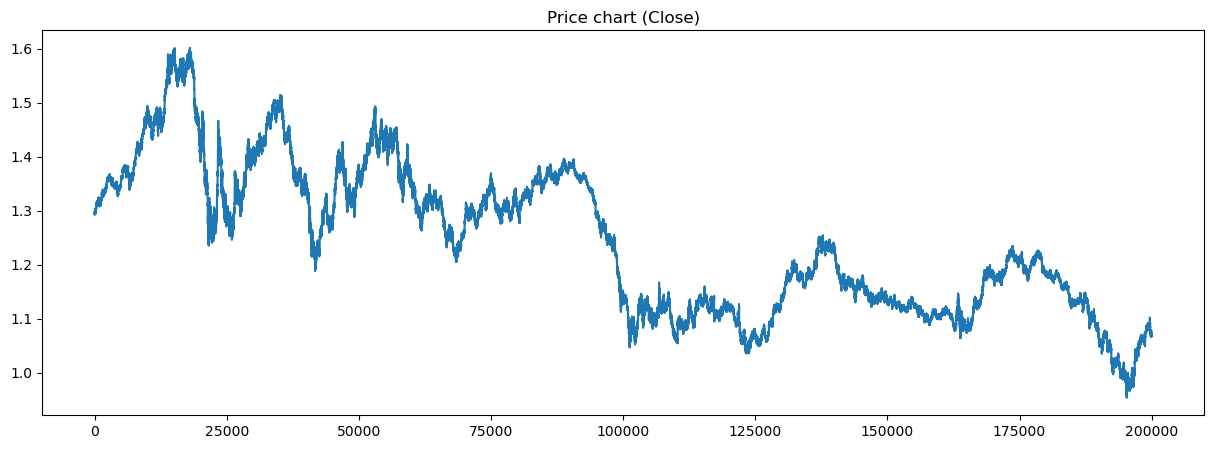

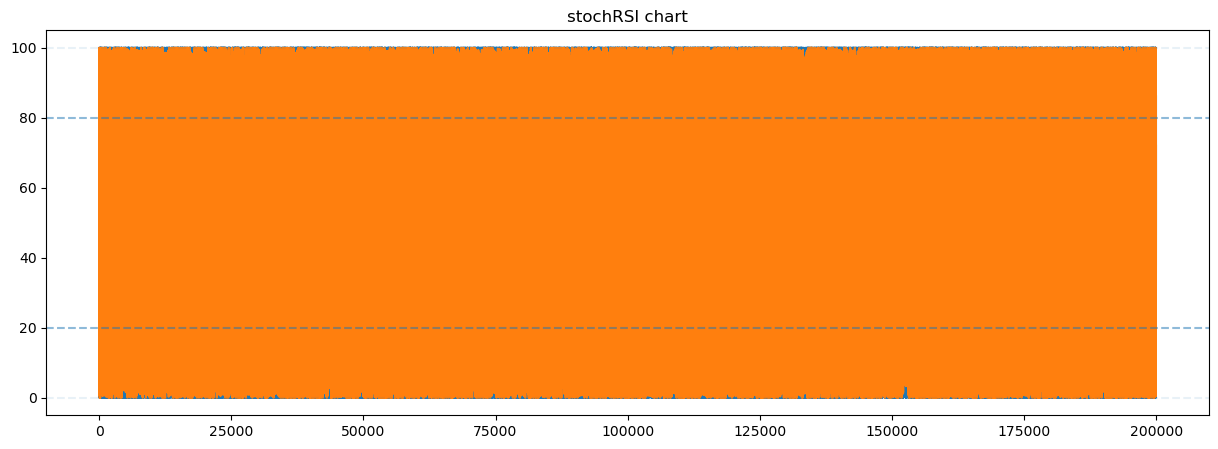

In [78]:
plot_all(df)

In [79]:
df.to_csv('Z:\projects\ez_money\pre_processed_data\stochrsi\\eurusd_m30_stochrsi.csv')